# Manipulating images as digital arrays

Images are represented in ``scikit-image`` using standard ``numpy`` arrays.  This allows maximum inter-operability with other libraries in the scientific Python ecosystem, such as ``matplotlib`` and ``scipy``. Moreover, manipulating images as ``numpy`` arrays benefits from the ``numpy`` library itself, with indexing, slicing or custom functions.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Images are numpy array objects.

In [2]:
from skimage import data
coins = data.coins()

In [3]:
type(coins)

numpy.ndarray

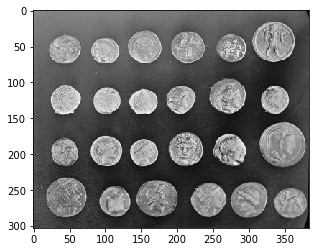

In [4]:
plt.imshow(coins, cmap='gray')

In [5]:
print("Pixel value:", coins[0, 0])
print("Data type:", coins.dtype)
print("Interval of pixel values:", (coins.min(), coins.max()))
print("Image dimension:", coins.shape)

Pixel value: 47
Data type: uint8
Interval of pixel values: (1, 252)
Image dimension: (303, 384)


(300, 451, 3)


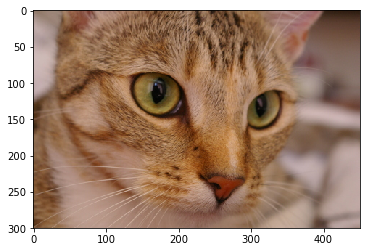

In [6]:
cat = data.chelsea()
plt.imshow(cat)
print(cat.shape)

These are *just numpy arrays*. Making a red square is easy using just array slicing and manipulation:

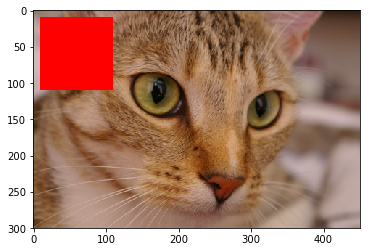

In [7]:
cat[10:110, 10:110, :] = [255, 0, 0]  # [red, green, blue]
plt.imshow(cat);

### Other shapes, and their meanings

|Image type|Coordinates|
|:---|:---|
|2D grayscale|(row, column)|
|2D multichannel|(row, column, channel)|
|3D grayscale|(plane, row, column)|
|3D multichannel|(plane, row, column, channel)|

<div class="alert alert-success">
    <b>EXERCISE</b>: modify the cat picture with a 20-pixel black frame around it.

![image](cat_frame.png)

When you're finished, draw a violet frame instead of a black one.

</div>

**Stop here. We will discuss the solution together.**

## Masks: accessing subsets of images with boolean conditions

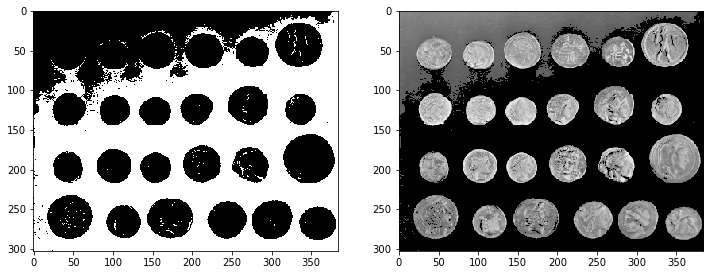

In [8]:
mask_bg = coins < 90
coins_bg = np.copy(coins)
coins_bg[mask_bg] = 0
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))
axes[0].imshow(mask_bg, cmap='gray')
axes[1].imshow(coins_bg, cmap='gray')

<div class="alert alert-success">
    <b>EXERCISE:</b> Convert color image to grayscale
<br>
The *relative luminance* of an image is the intensity of light coming from each point. Different colors contribute differently to the luminance: it's very hard to have a bright, pure blue, for example. So, starting from an RGB image, the luminance is given by:

$$
Y = 0.2126R + 0.7152G + 0.0722B
$$
<br>
Write a function to convert an RGB image to a grayscale luminance image.
<br>
Compare your results to that obtained with `skimage.color.rgb2gray`.
</div>

In [9]:
from skimage import img_as_float
cat_f = img_as_float(cat)
cat_gray = 0.2126 * cat_f[..., 0] + 0.7152 * cat_f[..., 1] + 0.0722 * cat_f[..., 2]
from skimage import color
np.allclose(cat_gray, color.rgb2gray(cat), rtol=1.e-3)

True

## Data types of pixel values

In literature, one finds different conventions for representing image values:

```
  0 - 255   where  0 is black, 255 is white
  0 - 1     where  0 is black, 1 is white
```

``scikit-image`` supports both conventions -- the choice is determined by the data-type of the array: [0-1] is for float data-type, while 0 - 255 is for uint8 (and more generally, [0 - 2^n - 1] for n-bits images, since it is possible to open 16-bit tiff images, for example).

Careful with overflows with integer data types

Data type: uint8


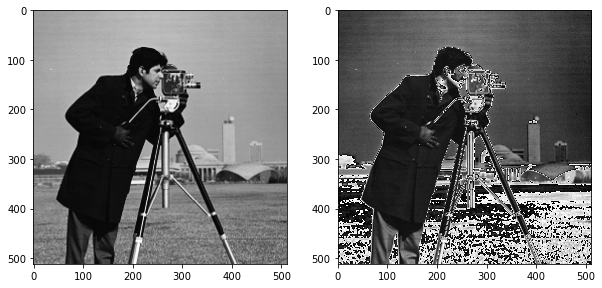

In [10]:
camera = data.camera()
print("Data type:", camera.dtype)
camera_overflow = 2 * camera
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
axes[0].imshow(camera, cmap='gray')
axes[1].imshow(camera_overflow, cmap='gray')

In [11]:
from skimage import img_as_float
camera_float = img_as_float(camera)
print("Max for uint dtype:", camera.max())
print("Max for float dtype:", camera_float.max())

Max for uint dtype: 255
Max for float dtype: 1.0


camera : uint8 255
camera_gaussian: float64 0.856099489785


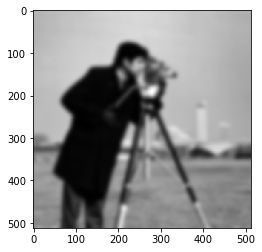

In [12]:
from skimage import filters
camera_gaussian = filters.gaussian(camera, sigma=5)
print("camera :", camera.dtype, camera.max())
print("camera_gaussian:", camera_gaussian.dtype, camera_gaussian.max())
plt.imshow(camera_gaussian, cmap='gray')

## Input / output: opening and saving from/to image files

Most classical (8-bit) image formats are supported (jpg, png, tiff) by ``skimage.io``, as well as 16-bit tiff images. Float raw data can be opened directly by ``numpy`` functions ``fromfile`` or ``memmap``. Other specialized data formats (HDF5, DICOM, ...) can be opened with specialized libraries (``pytables``, etc.).

In [13]:
import skimage
import os
data_dir = skimage.data_dir
camera_filename = os.path.join(data_dir, "camera.png")
print(camera_filename)

/home/emma/travail/projects/scikit-image/skimage/data/camera.png


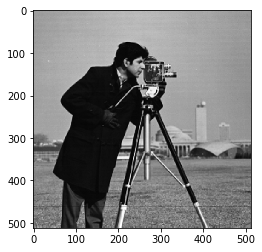

In [14]:
from skimage import io
camera = io.imread(camera_filename)
plt.imshow(camera, cmap='gray')

In [15]:
import tempfile
tmp_dir = tempfile.mkdtemp()
file_name = os.path.join(tmp_dir, "my_camera.png")
io.imsave(file_name, camera)
os.listdir(tmp_dir)

['my_camera.png']

In [16]:
file_name = os.path.join(tmp_dir, "gaussian_camera.png")
io.imsave(file_name, camera_gaussian)

/home/emma/travail/projects/scikit-image/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
